In [1]:
import pandas as pd

df=pd.read_excel(r"C:\Users\dell\python/titanic.xlsx")

In [2]:
df.head()

,passenger,survived,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [3]:
df.drop(['passenger','name','sibsp','parch','ticket','cabin','embarked'],axis='columns',inplace=True)


In [4]:
df.head()

,survived,Pclass,sex,age,fare
0,0.0,3.0,male,22.0,7.2500
1,1.0,1.0,female,38.0,71.2833
2,1.0,3.0,female,26.0,7.9250
3,1.0,1.0,female,35.0,53.1000
4,0.0,3.0,male,35.0,8.0500


In [5]:
target=df["survived"].astype(int)
target.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int32

In [6]:
inputs=df.drop('survived',axis='columns')
inputs.head()

,Pclass,sex,age,fare
0,3.0,male,22.0,7.2500
1,1.0,female,38.0,71.2833
2,3.0,female,26.0,7.9250
3,1.0,female,35.0,53.1000
4,3.0,male,35.0,8.0500


In [7]:
inputs.sex=inputs.sex.map({'male':1,'female':2})

In [8]:
inputs.age[0:11]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: age, dtype: float64

In [9]:
inputs.age=inputs.age.fillna(inputs.age.mean())

In [10]:
inputs.age[0:8]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    31.862035
6    54.000000
7     2.000000
Name: age, dtype: float64

In [11]:
inputs.head()

,Pclass,sex,age,fare
0,3.0,1,22.0,7.2500
1,1.0,2,38.0,71.2833
2,3.0,2,26.0,7.9250
3,1.0,2,35.0,53.1000
4,3.0,1,35.0,8.0500


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)

In [14]:
len(X_train)

712

In [15]:
len(X_test)

179

In [16]:
from sklearn import tree

In [21]:
model=tree.DecisionTreeClassifier()


In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
model.score(X_train,y_train)

0.9859550561797753

In [24]:
model.predict([[1.0,2,38.0,71.2833]])

array([1])

In [25]:
model.score(X_test,y_test)

0.8044692737430168

In [27]:
from sklearn import metrics

In [29]:
y_predicted = model.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predicted)
cm

array([[104,  19],
       [ 16,  40]], dtype=int64)

In [30]:
import matplotlib.pyplot as plt

import seaborn as sn


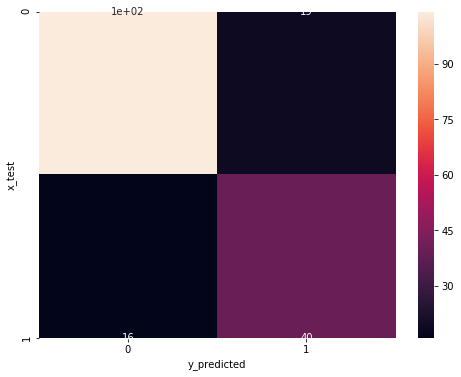

In [31]:
plt.figure (figsize=(8,6))
sn.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('x_test')
plt.show()